# Business problem:

Companies usually have a greater focus on customer acquisition and keep retention as a secondary priority. However, t can cost five times more to attract a new customer than it does to retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to 95%, according to research done by Bain & Company.

Churn is a metric that shows customers who stop doing business with a company or a particular service, also known as customer attrition. By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans.

But what if you could know in advance that a specific customer is likely to leave your business, and have a chance to take proper actions in time to prevent it from happening?
The reasons that lead customers to the cancellation decision can be numerous, coming from poor service quality, delay on customer support, prices, new competitors entering the market, and so on. Usually, there is no single reason, but a combination of events that somehow culminated in customer displeasure.

If your company were not capable to identify these signals and take actions prior to the cancel button click, there is no turning back, your customer is already gone. But you still have something valuable: the data. Your customer left very good clues about where you left to be desired. It can be a valuable source for meaningful insights and to train customer churn models. Learn from the past, and have strategic information at hand to improve future experiences, it’s all about machine learning.

Our goal in this project is to first identify high value customers for whom churn behaviour is to be understood. Subsequent to that we need to train a machine learning model to understand which customer behaviour leads to churn. Post model deployment, our model wil check iff the customer is a high value customer and then will alert us to take the necessary steps to prevent his/her churn.

# Initialisation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
plt.style.use('fivethirtyeight')
df = pd.read_csv(r"Telco-Customer-Churn.csv")
df.drop(["customerID"], axis=1, inplace=True)
pd.options.display.max_columns =100
from numpy import random

# Data description

In [3]:
print("Are there any missing columns \n", ((pd.DataFrame(df.isnull().sum()).sum())>0))

Are there any missing columns 
 0    False
dtype: bool


In [4]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Data exploration

## Personal features

In [150]:
#Getting the values for the pie plot
t=df[df.Churn=="Yes"].gender.size
m=(pd.Series(map(int,df[df.Churn=="Yes"].gender=="Male"))).sum()
f=t-m
l1=['Male','Female']
v1=[m,f]

ts=df[df.Churn=="Yes"].SeniorCitizen.size
s=(pd.Series(map(int,df[df.Churn=="Yes"].SeniorCitizen==1))).sum()
ns=ts-s
l2=['Senior Citizen','Not a senior citizen']
v2=[s,ns]

tp=df[df.Churn=="Yes"].Partner.size
p=(pd.Series(map(int,df[df.Churn=="Yes"].Partner=="Yes"))).sum()
np=tp-p
l3=['Committed','Single']
v3=[p,np]
td=df[df.Churn=="Yes"].Dependents.size
d=(pd.Series(map(int,df[df.Churn=="Yes"].Dependents=="Yes"))).sum()
nd=td-d
l4=['Has dependents','No dependents']
v4=[d,nd]

#Making the figure
fig = make_subplots(rows=2,cols=2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=l1, values=v1),1,1)
fig.add_trace(go.Pie(labels=l2, values=v2),1,2)
fig.add_trace(go.Pie(labels=l3, values=v3),2,1)
fig.add_trace(go.Pie(labels=l4, values=v4),2,2)

fig.update_traces(hole=0.7, textinfo='label+percent', insidetextorientation='radial', showlegend=False)
fig.update_layout(autosize=False, width=1500, height=800)
fig.update(layout_title_text="Effect of personal factors on churn", layout_title_font_size=24)    
fig.show()

Observations:

* Gender has no influence on churn
* Single people are more likely to churn
* People without dependents are more likely to churn

## Contract features

Text(0.5, 0.98, 'Relation between the type of contract and churn')

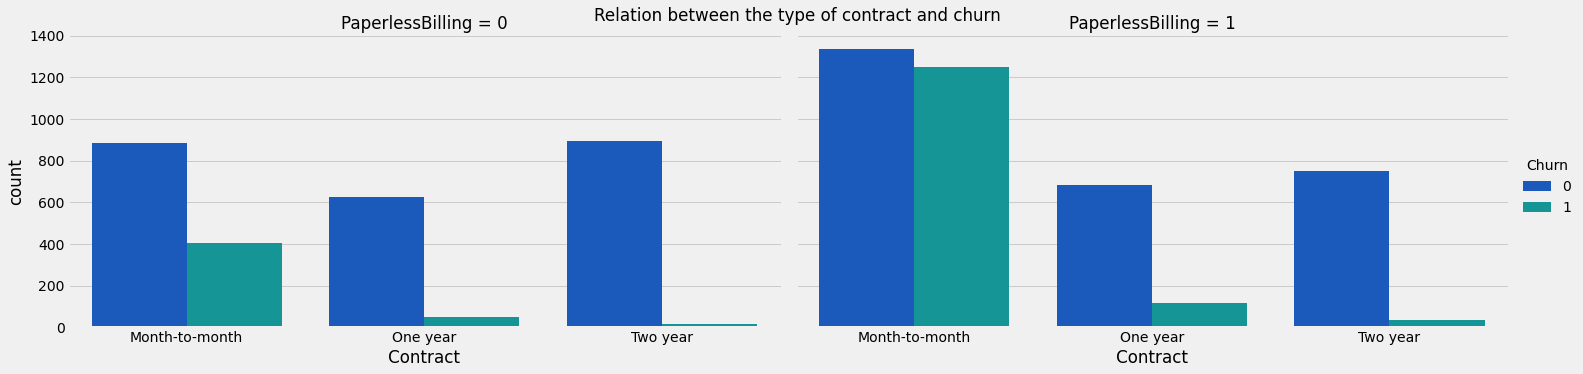

In [17]:
g=sns.catplot(data=df, x="Contract", col="PaperlessBilling", hue="Churn", kind="count", palette="winter", height=5, aspect=2.1)
g.fig.suptitle("Relation between the type of contract and churn")


Observations:

* Maximum people who churn are on a monthly contract and mostly bill in a paperless manner. Maybe these are tech savvy people who switch to a different carrier as soon as they find a better deal

In [18]:
fig1 = go.Figure(data=[
go.Bar(name="Churn", x= pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values),
go.Bar(name="Non churn", x= pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values)])

# Change the bar mode
fig1.update_layout(barmode='relative', width=1280, height=400)
fig1.update(layout_title_text="Relation between type of payment and churn", layout_title_font_size=24)    
fig1.show()

Observations

* Maximum people who pay electronically, churn. This supports our hypothesis that tech savvy people churn more often.

In [19]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.TotalCharges.fillna(0, inplace=True)

Text(0.5, 1.0, 'Relation between charges and churn')

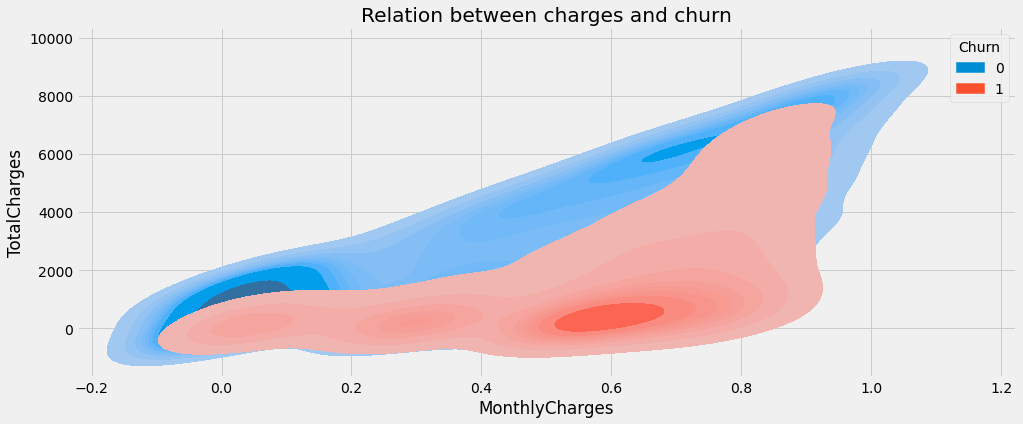

In [20]:
plt.figure(figsize=(15,6))
sns.kdeplot(x=df.MonthlyCharges, y=df.TotalCharges, hue=df.Churn, fill=True, multiple="stack")
plt.title("Relation between charges and churn")

Observations

* Most of the people who churn have low total charges with the carrier. 
* Some people who churn are customers who have high monthly and total charges. These are valuable customers whom we would want to retain.

Text(0.5, 1.0, 'Distribution of tenure with churn')

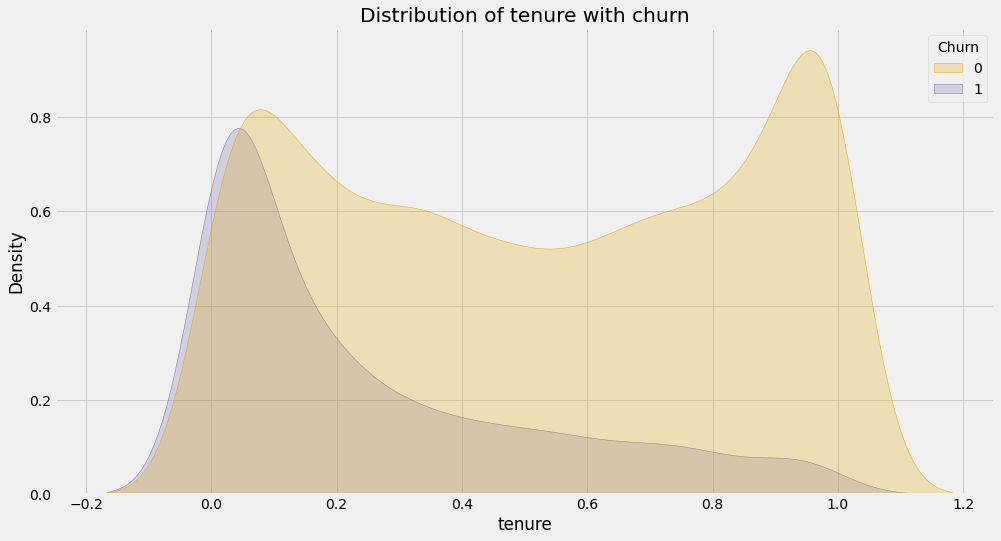

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.tenure,hue=df.Churn, shade=True, palette="Dark2_r")
plt.title("Distribution of tenure with churn")

Observations:

* Maximum customers who churn churn in the early period. We have to try to reduce early discontinuations of our service

## Service features

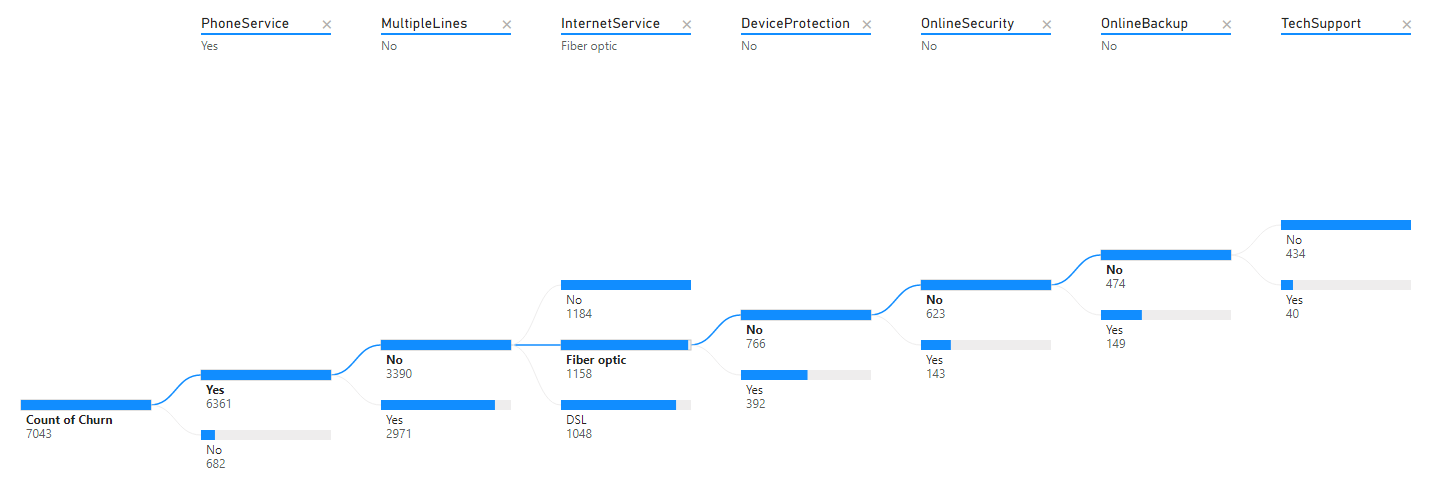

In [22]:
Image(filename = "img.png")

Observations

* Customers with single phone service and no internet service churn the most
* Among customers with internet service, they choose the faster Fibre optic without any protection/security or backup and churn the most 
* Among these customers who have churned, most have never contacted the tech support

These customers are young tech savvy thrifty customers who supposedly change the subscription as soon as they spot a better offer.

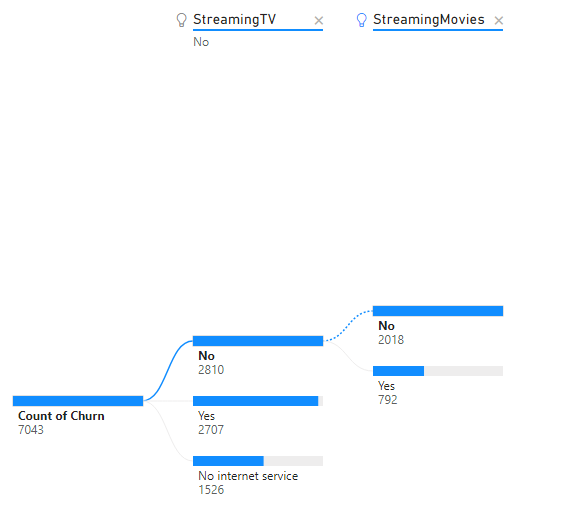

In [23]:
Image(filename = "img2.png")

Observations:

* Maximum people who churn do not stream movies or TV, i.e. they are not dependent on the subscription for streamed media consumption

# Data preparation

In [24]:
from sklearn.preprocessing import LabelBinarizer

l=LabelBinarizer()

df["gender"]=l.fit_transform(df.gender)
df["Partner"]=l.fit_transform(df.Partner)
df["Dependents"]=l.fit_transform(df.Dependents)
df["PhoneService"]=l.fit_transform(df.PhoneService)
df["PaperlessBilling"]=l.fit_transform(df.PaperlessBilling)
df["Churn"]=l.fit_transform(df.Churn)

df.tenure = (df.tenure-df.tenure.min())/(df.tenure.max()-df.tenure.min())
df.MonthlyCharges = (df.MonthlyCharges-df.MonthlyCharges.min())/(df.MonthlyCharges.max()-df.MonthlyCharges.min())
df.TotalCharges = (df.TotalCharges-df.TotalCharges.min())/(df.TotalCharges.max()-df.TotalCharges.min())
df[["MultipleLines_No","MultipleLines_Yes"]]=pd.get_dummies(df.MultipleLines)[["No","Yes"]]

df[["InternetService_DSL","InternetService_Fibre_Optic"]]=pd.get_dummies(df.InternetService)[["DSL","Fiber optic"]]
df[["OnlineSecurity_No","OnlineSecurity_Yes"]]=pd.get_dummies(df.OnlineSecurity)[["No","Yes"]]
df[["OnlineBackup_No","OnlineBackup_Yes"]]=pd.get_dummies(df.OnlineBackup)[["No","Yes"]]
df[["DeviceProtection_No","DeviceProtection_Yes"]]=pd.get_dummies(df.DeviceProtection)[["No","Yes"]]
df[["TechSupport_No","TechSupport_Yes"]]=pd.get_dummies(df.TechSupport)[["No","Yes"]]
df[["StreamingTV_No","StreamingTV_Yes"]]=pd.get_dummies(df.StreamingTV)[["No","Yes"]]
df[["StreamingMovies_No","StreamingMovies_Yes"]]=pd.get_dummies(df.StreamingMovies)[["No","Yes"]]
df[["Contract_monthly","Contract_one_year"]] = pd.get_dummies(df.Contract)[["Month-to-month","One year"]]
df[["Payment_bank_transfer","Payment_electronic_check","Payment_mailed_check"]] = pd.get_dummies(df.PaymentMethod)[["Bank transfer (automatic)","Electronic check","Mailed check"]]
df.drop(["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"],axis=1,inplace=True)

## CLustering high value customers

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

score=[]

'''
for i in range(2,50):
    Kmean = KMeans(n_clusters=i,init='k-means++')
    Kmean.fit(df.drop(['Churn'],axis=1))
    score.append(silhouette_score(df.drop(['Churn'],axis=1),Kmean.labels_))
'''
Kmean = KMeans(n_clusters=2,init='k-means++')
Kmean.fit(df.drop(['Churn'],axis=1))
df['labels']=Kmean.labels_

In [26]:
cluster_one=df[df.labels==0]
cluster_two=df[df.labels==1]

In [27]:
print(cluster_one.Churn.mean())
print(cluster_two.Churn.mean())


0.09187749667110519
0.4635036496350365


In [28]:
print(cluster_one.TotalCharges.mean())
print(cluster_two.TotalCharges.mean())

0.33469458279405406
0.1800451651160649


In [29]:
print(cluster_one.MonthlyCharges.mean())
print(cluster_two.MonthlyCharges.mean())

0.3912681598664467
0.5444978574281876


In [30]:
print(cluster_one.tenure.mean())
print(cluster_two.tenure.mean())

0.6021526853084777
0.27537848067045145


Observations:

* Cluster two customers have a low churn rate
* These customers have more total charges

We need to understand their churn behaviour


In [31]:
dfr=cluster_two

## Training and test set

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfr.drop(["Churn"],axis=1), dfr.Churn, test_size=0.1, random_state=42)

# Modellling

## Model preparation

In [79]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=16)
dt.fit(X_train, y_train)
ypr_dt=dt.predict(X_test)
dt.score(X_test,y_test)

0.574468085106383

In [80]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(X_train, y_train)
ypr_nb=nb.predict(X_test)
nb.score(X_test,y_test)

0.668693009118541

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=16, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)
ypr_rf=rf.predict(X_test)
rf.score(X_test,y_test)

0.6443768996960486

In [82]:
from sklearn.neighbors import KNeighborsClassifier
import math
score=[]
'''
for i in range(1,round(math.sqrt(X_o.shape[0])),2):
    knnc = KNeighborsClassifier(n_neighbors=i)
    knnc.fit(X_train,y_train)                           #To find knee point
    score.append(knnc.score(X_test, y_test))
pd.DataFrame(score).sort_values(0, ascending=False)
'''
knnc= KNeighborsClassifier(n_neighbors=77)
knnc.fit(X_train,y_train)
y_knn=knnc.predict(X_test)
knnc.score(X_test, y_test)

0.6747720364741642

In [83]:
from sklearn.svm import SVC
SV = SVC(kernel="linear")
SV.fit(X_train, y_train)
y_svc=SV.predict(X_test)
SV.score(X_test, y_test)


0.6838905775075987

In [84]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver="saga")
lr.fit(X_train, y_train)
ypr_lr=lr.predict(X_test)
lr.score(X_test,y_test)

C:\Users\Anupam\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



0.6869300911854104

# Business implication

## Let cost of churn of a customer be Rs. 5000
## Let cost of focusing effort on a customer to prevent churn be Rs. 3000


In [137]:
c=5000 #Cost of churn
f=3000 #Cost of focusing effort

In [146]:
from sklearn.metrics import confusion_matrix

print("\n Decision tree\n")
x=confusion_matrix(y_test,ypr_dt)
print(f"Percentage of valuable customers predicted by our model who were going to churn: {round(x[1,1]/(x[1,0]+x[1,1])*100,2)}%")
print(f"Percentage of customers missed who were going to churn: {round(x[1,0]/(x[1,0]+x[1,1])*100,2)}%")
print("Lost revenue if we are not able to identify customers=Rs. ", (x[1,0]+x[1,1])*c) 
print("Revenue obtained by preventing churn with our model=Rs. ", x[1,1]*c-x[1,0]*c-x[0,1]*f)

print("\n Random forest\n")
x=confusion_matrix(y_test,ypr_rf)
print(f"Percentage of valuable customers predicted by our model who were going to churn: {round(x[1,1]/(x[1,0]+x[1,1])*100,2)}%")
print(f"Percentage of customers missed who were going to churn: {round(x[1,0]/(x[1,0]+x[1,1])*100,2)}%")
print("Lost revenue if we are not able to identify customers=Rs. ", (x[1,0]+x[1,1])*c) 
print("Revenue obtained by preventing churn with our model=Rs. ", x[1,1]*c-x[1,0]*c-x[0,1]*f)

print("\n Logistic regression\n")
x=confusion_matrix(y_test,ypr_lr)
print(f"Percentage of valuable customers predicted by our model who were going to churn: {round(x[1,1]/(x[1,0]+x[1,1])*100,2)}%")
print(f"Percentage of customers missed who were going to churn: {round(x[1,0]/(x[1,0]+x[1,1])*100,2)}%")
print("Lost revenue if we are not able to identify customers=Rs. ", (x[1,0]+x[1,1])*c) 
print("Revenue obtained by preventing churn with our model=Rs. ", x[1,1]*c-x[1,0]*c-x[0,1]*f)

print("\n Naive Bayes\n")
x=confusion_matrix(y_test,ypr_nb)
print(f"Percentage of valuable customers predicted by our model who were going to churn: {round(x[1,1]/(x[1,0]+x[1,1])*100,2)}%")
print(f"Percentage of customers missed who were going to churn: {round(x[1,0]/(x[1,0]+x[1,1])*100,2)}%")
print("Lost revenue if we are not able to identify customers=Rs. ", (x[1,0]+x[1,1])*c) 
print("Revenue obtained by preventing churn with our model=Rs. ", x[1,1]*c-x[1,0]*c-x[0,1]*f)

cs=x[1,1]*c-x[1,0]*c-x[0,1]*f
print("\n KNN Classifier\n")
x=confusion_matrix(y_test,y_knn)
print(f"Percentage of valuable customers predicted by our model who were going to churn: {round(x[1,1]/(x[1,0]+x[1,1])*100,2)}%")
print(f"Percentage of customers missed who were going to churn: {round(x[1,0]/(x[1,0]+x[1,1])*100,2)}%")
print("Lost revenue if we are not able to identify customers=Rs. ", (x[1,0]+x[1,1])*c) 
print("Revenue obtained by preventing churn with our model=Rs. ", x[1,1]*c-x[1,0]*c-x[0,1]*f)

print("\n Support Vector Machine\n")
x=confusion_matrix(y_test,y_svc)
print(f"Percentage of valuable customers predicted by our model who were going to churn: {round(x[1,1]/(x[1,0]+x[1,1])*100,2)}%")
print(f"Percentage of customers missed who were going to churn: {round(x[1,0]/(x[1,0]+x[1,1])*100,2)}%")
print("Lost revenue if we are not able to identify customers=Rs. ", (x[1,0]+x[1,1])*c) 
print("Revenue obtained by preventing churn with our model=Rs. ", x[1,1]*c-x[1,0]*c-x[0,1]*f)


 Decision tree

Percentage of valuable customers predicted by our model who were going to churn: 57.32%
Percentage of customers missed who were going to churn: 42.68%
Lost revenue if we are not able to identify customers=Rs.  820000
Revenue obtained by preventing churn with our model=Rs.  -90000

 Random forest

Percentage of valuable customers predicted by our model who were going to churn: 59.15%
Percentage of customers missed who were going to churn: 40.85%
Lost revenue if we are not able to identify customers=Rs.  820000
Revenue obtained by preventing churn with our model=Rs.  0

 Logistic regression

Percentage of valuable customers predicted by our model who were going to churn: 64.02%
Percentage of customers missed who were going to churn: 35.98%
Lost revenue if we are not able to identify customers=Rs.  820000
Revenue obtained by preventing churn with our model=Rs.  98000

 Naive Bayes

Percentage of valuable customers predicted by our model who were going to churn: 77.44%
Per

In [147]:
x = random.randint(df.shape[0], size=(round(df.shape[0]*0.5)))
randcust = df.Churn.iloc[x]
cos=randcust.sum()*c-(x.shape[0]-randcust.sum())*f
print(f"Revenue obtained by focusing effort on random 50% of the population= Rs. {cos}")

Revenue obtained by focusing effort on random 50% of the population= Rs. -2838000


In [148]:
print(f"Our Naive Bayes model saved us Rs. {cs-cos} compared to a random selection of 50% customers")

Our Naive Bayes model saved us Rs. 3072000 compared to a random selection of 50% customers


# TODO:

Check different clustering methods available in Python